In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Merged_Data_2021-2022.csv', parse_dates=['Date'], )

In [3]:
df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2021-01-01,320,04:26,Friday,YONGE AND STEELES,Emergency Services,0,0,N,1553
1,2021-01-01,63,05:04,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N,8144
2,2021-01-01,42,05:34,Friday,WILSON GARAGE,Mechanical,24,48,N,8365
3,2021-01-01,320,05:44,Friday,YONGE AND STEELES,Emergency Services,15,30,N,8181
4,2021-01-01,35,06:21,Friday,JANE STATION,Vision,30,60,E,3186
...,...,...,...,...,...,...,...,...,...,...
96339,2022-11-30,44,00:34,Wednesday,KIPLING STATION,Investigation,0,0,NaN,7943
96340,2022-11-30,22,00:41,Wednesday,STRATHMORE AND COXWELL,Emergency Services,10,20,W,8586
96341,2022-11-30,116,01:11,Wednesday,NORTH SERVICE ROAD AND,Cleaning - Unsanitary,11,22,W,1386
96342,2022-11-30,32,01:20,Wednesday,EGLINTON AND DUPLEX,Cleaning - Unsanitary,8,16,E,1356


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       96344 non-null  datetime64[ns]
 1   Route      95747 non-null  object        
 2   Time       96344 non-null  object        
 3   Day        96344 non-null  object        
 4   Location   96344 non-null  object        
 5   Incident   96344 non-null  object        
 6   Min Delay  96344 non-null  int64         
 7   Min Gap    96344 non-null  int64         
 8   Direction  79545 non-null  object        
 9   Vehicle    96344 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 7.4+ MB


In [5]:
# Data validation and cleansing


<AxesSubplot:>

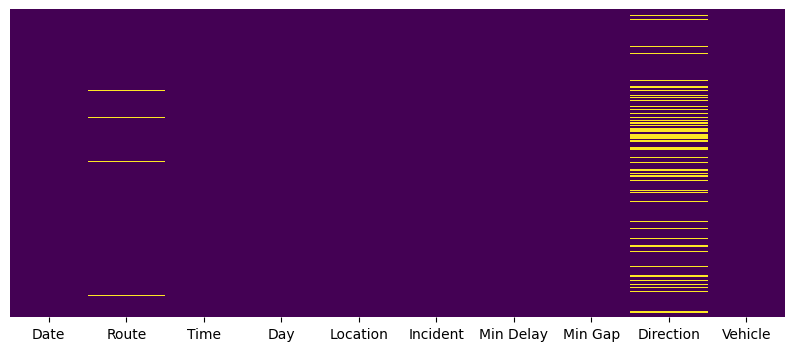

In [6]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [7]:
df.isnull().sum()

Date             0
Route          597
Time             0
Day              0
Location         0
Incident         0
Min Delay        0
Min Gap          0
Direction    16799
Vehicle          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2021-01-01,320,04:26,Friday,YONGE AND STEELES,Emergency Services,0,0,N,1553
1,2021-01-01,63,05:04,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N,8144
2,2021-01-01,42,05:34,Friday,WILSON GARAGE,Mechanical,24,48,N,8365
3,2021-01-01,320,05:44,Friday,YONGE AND STEELES,Emergency Services,15,30,N,8181
4,2021-01-01,35,06:21,Friday,JANE STATION,Vision,30,60,E,3186
...,...,...,...,...,...,...,...,...,...,...
96338,2022-11-30,53,23:49,Wednesday,MORNINGSIDE AND N OF P,Operations - Operator,10,20,N,3245
96340,2022-11-30,22,00:41,Wednesday,STRATHMORE AND COXWELL,Emergency Services,10,20,W,8586
96341,2022-11-30,116,01:11,Wednesday,NORTH SERVICE ROAD AND,Cleaning - Unsanitary,11,22,W,1386
96342,2022-11-30,32,01:20,Wednesday,EGLINTON AND DUPLEX,Cleaning - Unsanitary,8,16,E,1356


In [10]:
# Route column

df['Route'].unique()

array(['320', '63', '42', '35', '300', '38', '29', '85', '900', '36',
       '25', '106', '32', '95', '84', '108', '52', '41', '133', '62',
       '131', '129', '60', '126', '20', '116', '93', '6', '112', '39',
       '7', '51', '34', '939', '307', '96', '354', '47', '81', '109',
       '97', '70', '14', '100', '167', '67', '600', '53', '9', '5', '102',
       '86', '54', '43', '59', '75', '168', '64', '135', '87', '88', '11',
       '50', '21', '68', '89', '91', '24', '120', '79', '111', '94', '22',
       '121', '325', '189', '353', '935', '17', '995', '23', '45', '122',
       '104', '37', '16', '76', '73', '925', '83', '336', '46', '107',
       '125', '117', '927', '985', '123', '71', '110', '165', '929',
       '996', '15', '905', '352', '69', '65', '12', '124', '33', '57',
       '501', '72', '952', '339', '161', '986', '98', '105', '44', '40',
       '960', '169', '101', '56', '941', '48', '115', '127', '902', '134',
       '90', '92', '335', '162', '26', '55', '78', '953', '11

In [11]:
import re

df['Route'] = df['Route'].str.extract('(\d+)')

In [12]:
df.dropna(inplace=True)

In [13]:
df['Route'] = df['Route'].astype('int')

In [14]:
df['Time'] = pd.to_datetime(df['Time']).dt.time

In [15]:
df['Time']

0        04:26:00
1        05:04:00
2        05:34:00
3        05:44:00
4        06:21:00
           ...   
96338    23:49:00
96340    00:41:00
96341    01:11:00
96342    01:20:00
96343    01:23:00
Name: Time, Length: 79344, dtype: object

In [16]:
# dropping Vehicle as it only has unique values
df.drop(['Vehicle'], axis=1, inplace=True)

In [17]:
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction
0,2021-01-01,320,04:26:00,Friday,YONGE AND STEELES,Emergency Services,0,0,N
1,2021-01-01,63,05:04:00,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N
2,2021-01-01,42,05:34:00,Friday,WILSON GARAGE,Mechanical,24,48,N
3,2021-01-01,320,05:44:00,Friday,YONGE AND STEELES,Emergency Services,15,30,N
4,2021-01-01,35,06:21:00,Friday,JANE STATION,Vision,30,60,E


In [18]:
# Direction
# Taking Direction which only has value

df = df[df['Direction'].isin(['N','E','W','S'])]

In [19]:
df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction
0,2021-01-01,320,04:26:00,Friday,YONGE AND STEELES,Emergency Services,0,0,N
1,2021-01-01,63,05:04:00,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N
2,2021-01-01,42,05:34:00,Friday,WILSON GARAGE,Mechanical,24,48,N
3,2021-01-01,320,05:44:00,Friday,YONGE AND STEELES,Emergency Services,15,30,N
4,2021-01-01,35,06:21:00,Friday,JANE STATION,Vision,30,60,E
...,...,...,...,...,...,...,...,...,...
96338,2022-11-30,53,23:49:00,Wednesday,MORNINGSIDE AND N OF P,Operations - Operator,10,20,N
96340,2022-11-30,22,00:41:00,Wednesday,STRATHMORE AND COXWELL,Emergency Services,10,20,W
96341,2022-11-30,116,01:11:00,Wednesday,NORTH SERVICE ROAD AND,Cleaning - Unsanitary,11,22,W
96342,2022-11-30,32,01:20:00,Wednesday,EGLINTON AND DUPLEX,Cleaning - Unsanitary,8,16,E


In [20]:
df.describe()

,Route,Min Delay,Min Gap
count,78616.000000,78616.000000,78616.000000
mean,195.603185,18.238310,31.119874
std,3217.833302,40.053344,41.550283
min,1.000000,0.000000,0.000000
25%,37.000000,9.000000,18.000000
50%,71.000000,11.000000,22.000000
75%,120.000000,20.000000,36.000000
max,898630.000000,999.000000,999.000000


In [21]:
df['Direction'].value_counts()

N    20743
E    20233
S    19178
W    18462
Name: Direction, dtype: int64

#### Visualization

<AxesSubplot:xlabel='Direction', ylabel='count'>

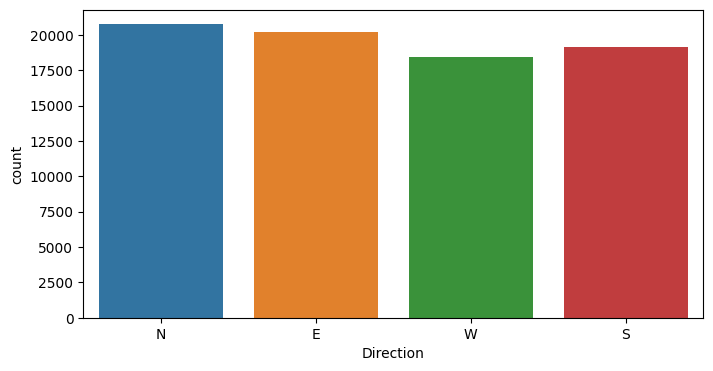

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x='Direction' , data=df)
# print(df['Direction'].value_counts())

<AxesSubplot:ylabel='Incident'>

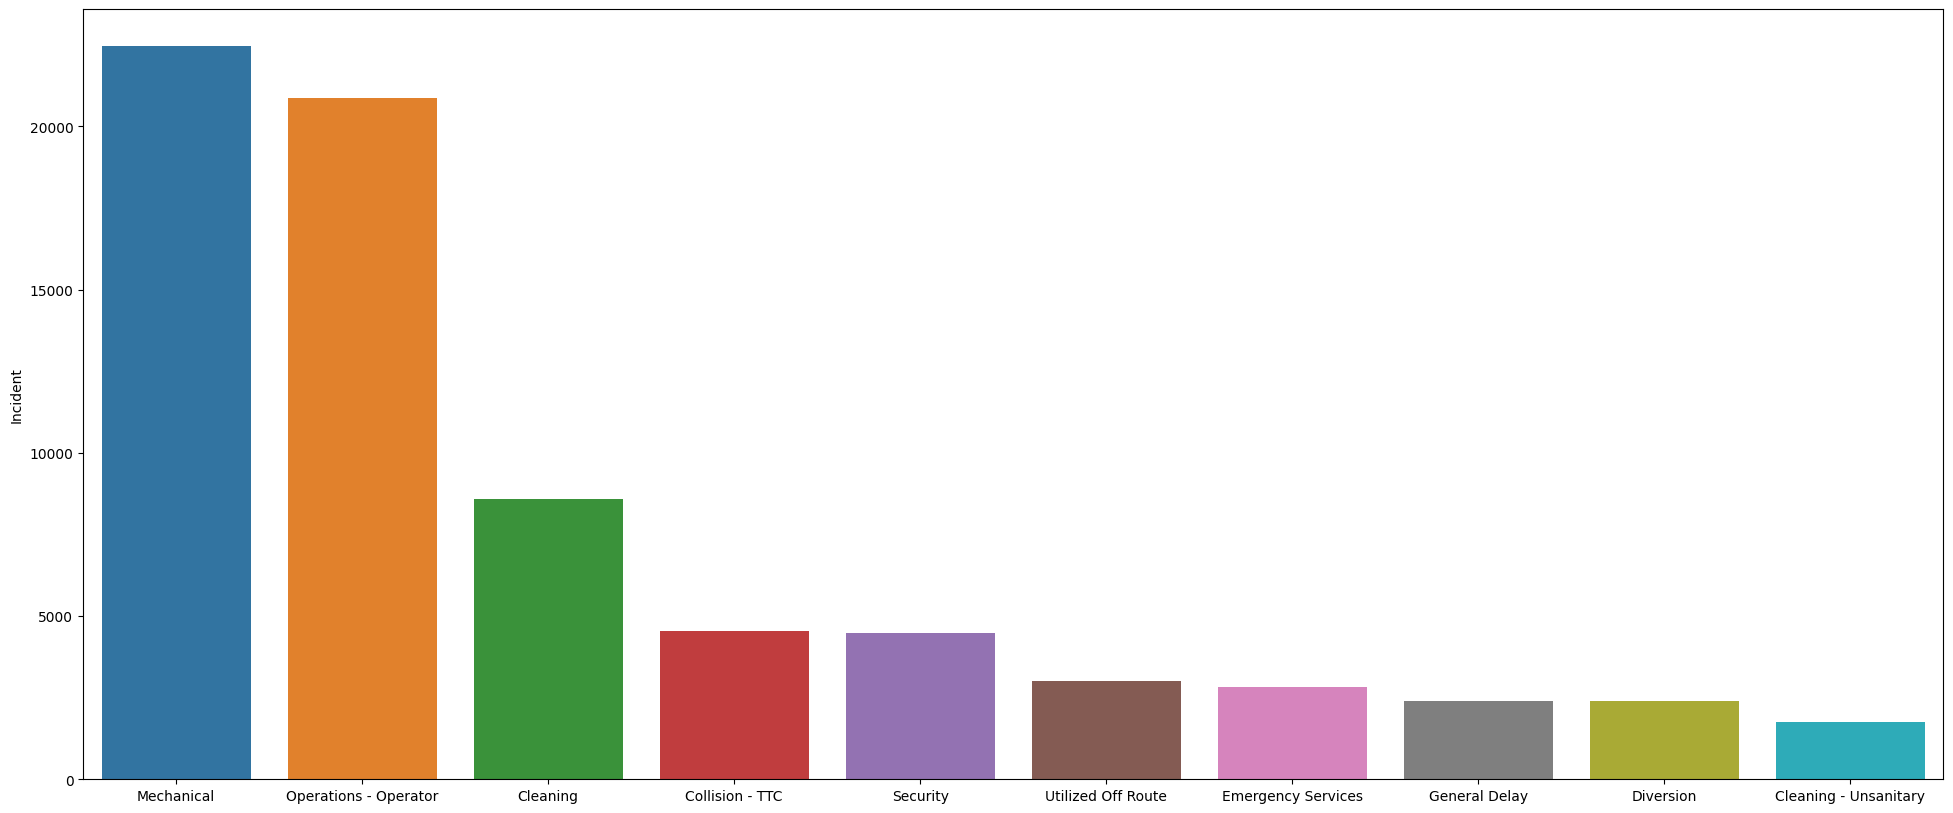

In [23]:
plt.rcParams["figure.figsize"] = (24,10)
Incident = df['Incident'].value_counts().nlargest(10)
sns.barplot(x=Incident.index, y=Incident)

(0.0, 50.0)

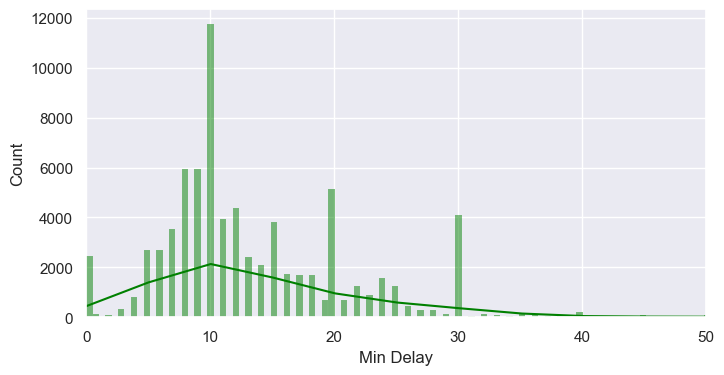

In [24]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data = df['Min Delay'], kde=True , color='green')
plt.xlim([0,50])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78616 entries, 0 to 96343
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       78616 non-null  datetime64[ns]
 1   Route      78616 non-null  int32         
 2   Time       78616 non-null  object        
 3   Day        78616 non-null  object        
 4   Location   78616 non-null  object        
 5   Incident   78616 non-null  object        
 6   Min Delay  78616 non-null  int64         
 7   Min Gap    78616 non-null  int64         
 8   Direction  78616 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 7.7+ MB


In [26]:
Hours = [x.hour for x in df['Time']]

In [27]:
Hour = pd.DataFrame(Hours, columns=['Hours'])

In [28]:
Hour['Hours'].value_counts()

14    6068
15    5670
17    5546
16    5527
13    5318
18    4777
10    4559
9     4430
12    4263
11    4009
19    3390
6     3197
8     3034
7     2937
20    2752
21    2601
5     2166
22    1968
23    1563
0     1230
1     1028
2      982
4      871
3      730
Name: Hours, dtype: int64

(0.0, 24.0)

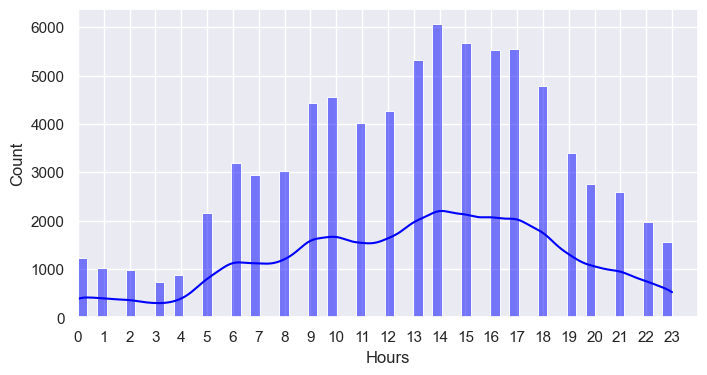

In [29]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data = Hour['Hours'], kde=True , color='blue')
plt.xticks(np.arange(0,24,1))
plt.xlim([0,24])

([<matplotlib.patches.Wedge at 0x1fe25458588>,
 [Text(0.8108103604706204, 0.8846392255340608, 'N'),
  Text(-0.9366795725478859, 0.7500875804674477, 'E'),
  Text(-0.746225890127081, -0.9397589695789266, 'W'),
  Text(0.8879689959761677, -0.8071623518134855, 'S')],
 [Text(0.4729727102745285, 0.5160395482282021, '26.39%'),
  Text(-0.5463964173196001, 0.4375510886060111, '25.74%'),
  Text(-0.43529843590746387, -0.5481927322543738, '24.39%'),
  Text(0.5179819143194312, -0.47084470522453314, '23.48%')])

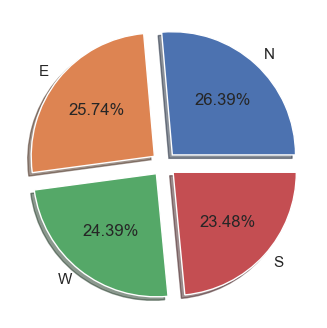

In [30]:
sns.set(rc={'figure.figsize':(8,4)})
values = list(df['Direction'].value_counts())
# print(values)
plt.pie(values,labels=df['Direction'].unique() , shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')

<AxesSubplot:xlabel='Direction'>

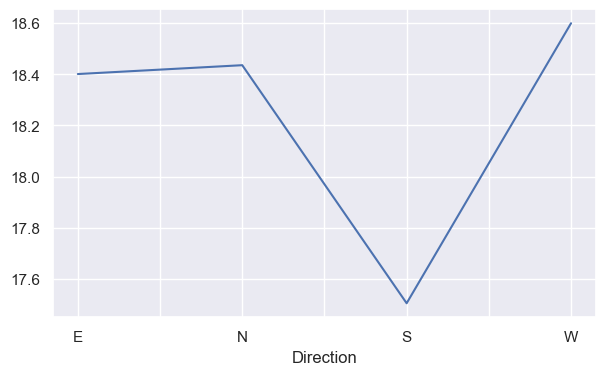

In [31]:
df.groupby('Direction')['Min Delay'].mean().plot(figsize=(7,4))

<AxesSubplot:xlabel='Day'>

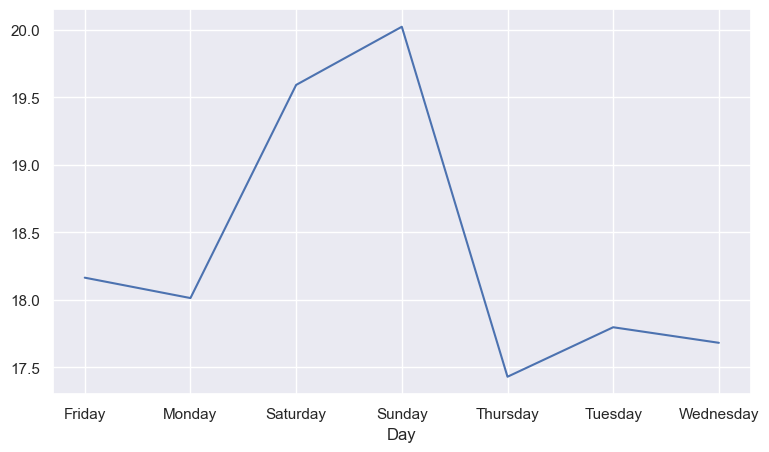

In [32]:
df.groupby('Day')['Min Delay'].mean().plot(figsize=(9,5))

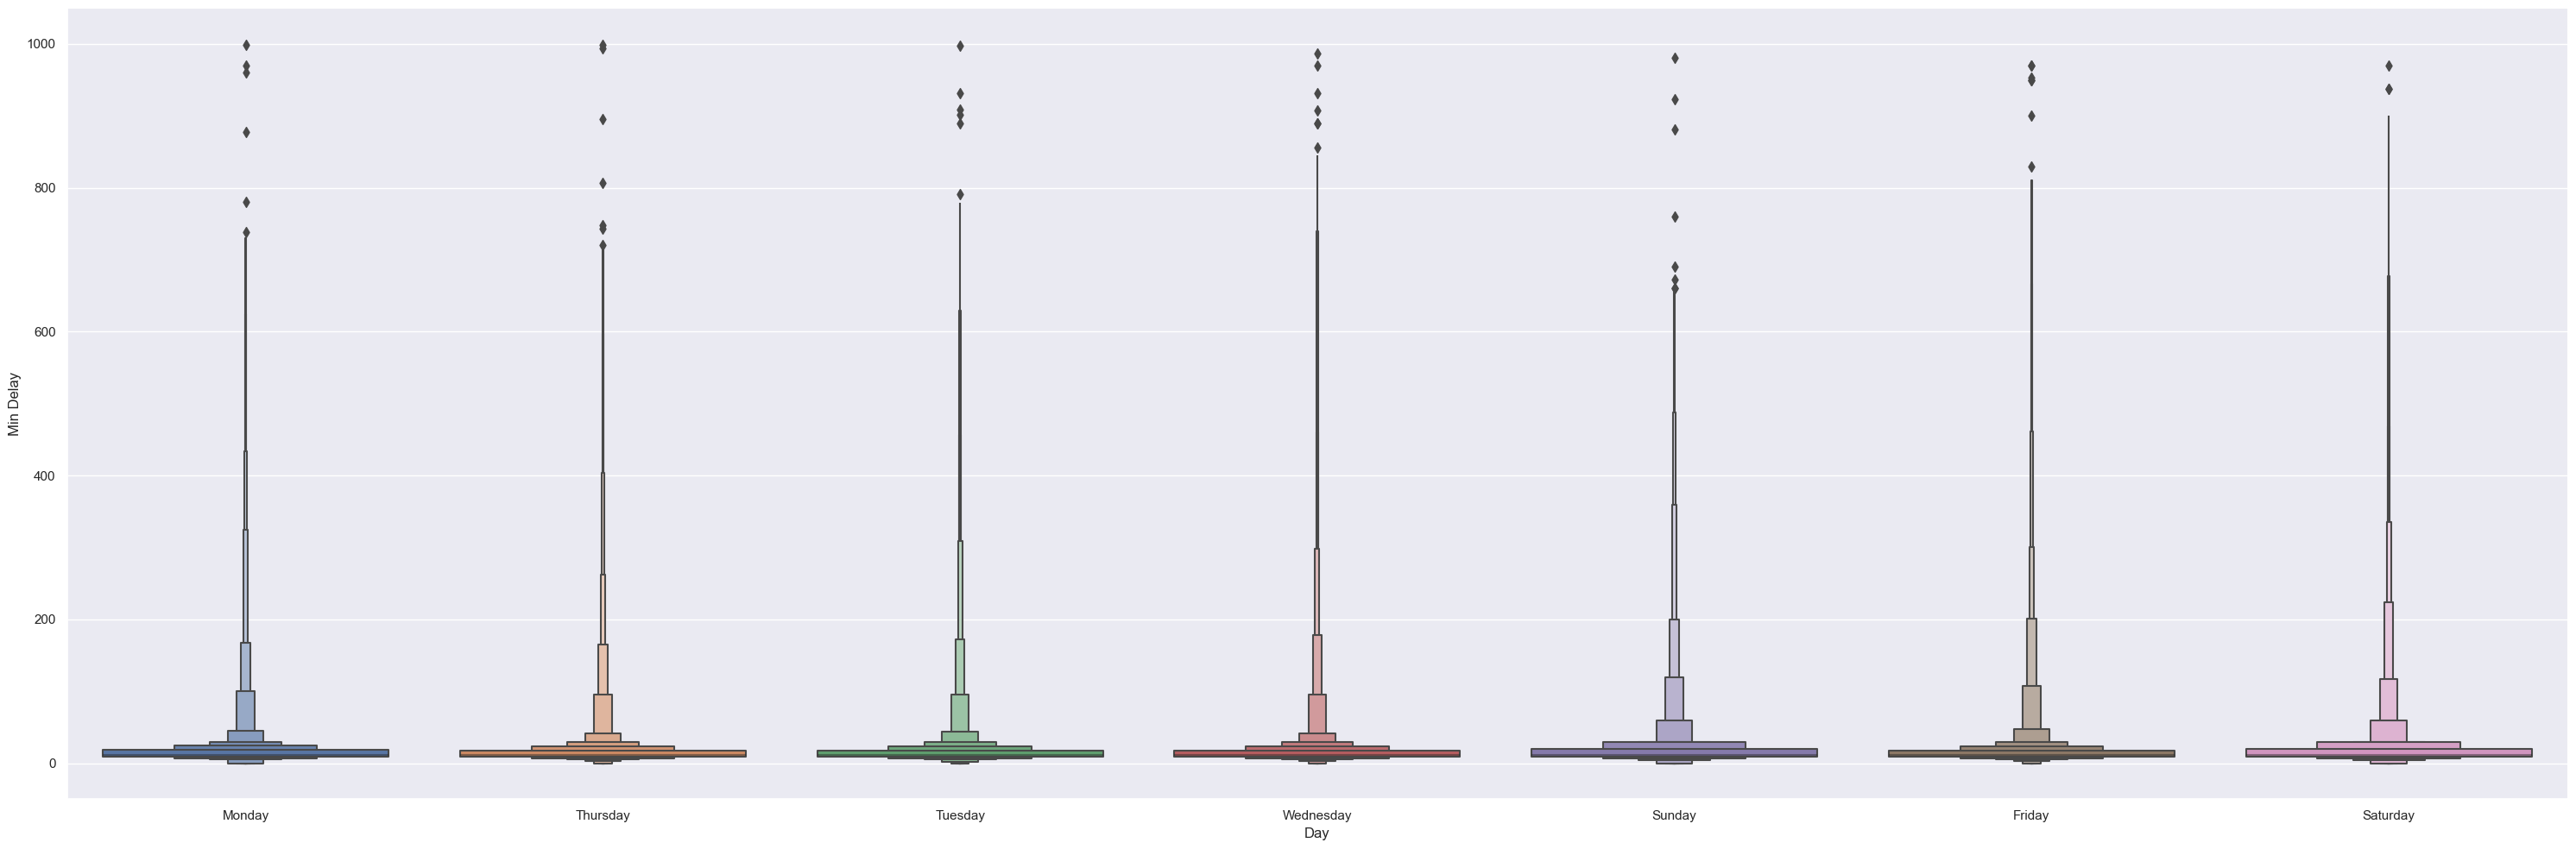

In [33]:
# sns.set(rc={'figure.figsize':(8,4)})
sns.catplot(y = "Min Delay", x = "Day", data = df.sort_values("Min Delay", ascending = False), kind="boxen", height = 10, aspect = 3)
plt.show()

In [34]:
df['Location'].value_counts().nlargest(20)

KENNEDY STATION           1884
SCARBOROUGH CENTRE STA    1596
PIONEER VILLAGE STATIO    1457
EGLINTON STATION          1385
KIPLING STATION           1378
WILSON STATION            1305
FINCH STATION             1161
WARDEN STATION             998
SHEPPARD WEST STATION      837
VICTORIA PARK STATION      818
PAPE STATION               803
FINCH WEST STATION         787
YORK MILLS STATION         771
EGLINTON WEST STATION      767
MAIN STREET STATION        722
DON MILLS STATION          637
LAWRENCE WEST STATION      635
JANE STATION               630
LAWRENCE STATION           556
KEELE STATION              524
Name: Location, dtype: int64

<AxesSubplot:ylabel='Incident'>

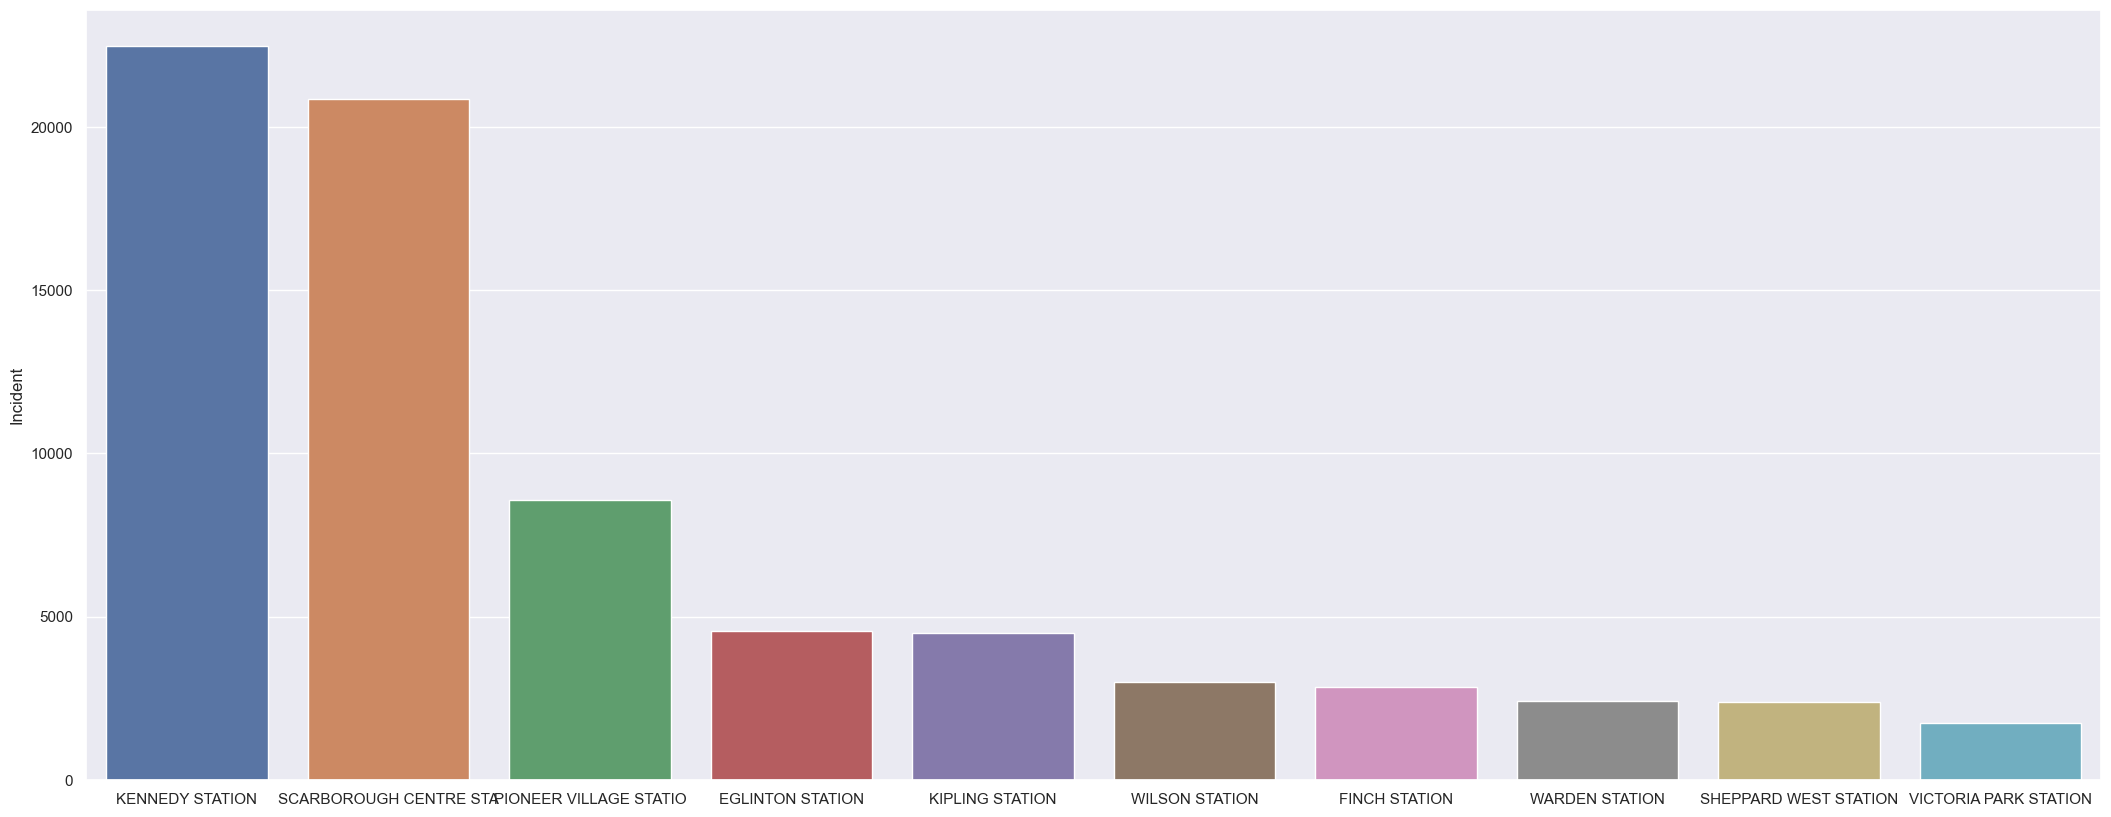

In [35]:
plt.rcParams["figure.figsize"] = (26,10)
Location = df['Location'].value_counts().nlargest(10)
sns.barplot(x=Location.index, y=Incident)

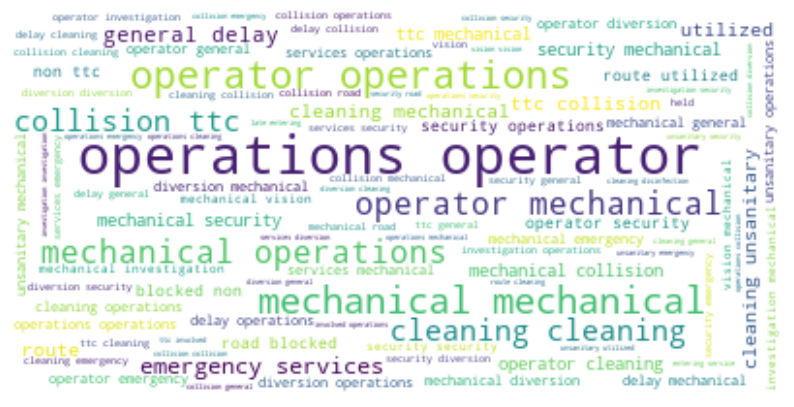

In [36]:
Text = " ".join(list(df['Incident'].str.lower()))
wordcloud = WordCloud(background_color="white").generate(Text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
import dtale

dtale.show(df)

###### Feature engineering

In [37]:
# Feature Encoding

from sklearn.preprocessing import LabelEncoder

In [38]:
lst = ['Day', 'Location' , 'Incident', 'Direction']

Lenco = LabelEncoder()

for ls in lst:
    df[ls] = Lenco.fit_transform(df[ls])

In [39]:
df = df[df['Location'].map(lambda x: df['Location'].value_counts()[x] > 1)]
df = df[df['Incident'].map(lambda x: df['Incident'].value_counts()[x] > 1)]

In [40]:
df = df.reset_index(drop=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71725 entries, 0 to 71724
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       71725 non-null  datetime64[ns]
 1   Route      71725 non-null  int32         
 2   Time       71725 non-null  object        
 3   Day        71725 non-null  int32         
 4   Location   71725 non-null  int32         
 5   Incident   71725 non-null  int32         
 6   Min Delay  71725 non-null  int64         
 7   Min Gap    71725 non-null  int64         
 8   Direction  71725 non-null  int32         
dtypes: datetime64[ns](1), int32(5), int64(2), object(1)
memory usage: 3.6+ MB


In [42]:
# Feature extraction


df1 = df.copy()
df1['Date1'] = df['Date'].dt.day
df1['Month'] = df['Date'].dt.month
df1['Hour'] = df['Time'].map(lambda x: x.hour)

In [43]:
df1 = df1.drop(['Date','Time'], axis=1)

In [44]:
df1

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Date1,Month,Hour
0,320,0,11201,6,0,0,1,1,1,4
1,63,0,1791,17,10,0,1,1,1,5
2,42,0,10867,17,24,48,1,1,1,5
3,320,0,11201,6,15,30,1,1,1,5
4,35,0,5076,25,30,60,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
71720,8,6,1641,6,30,60,1,30,11,23
71721,100,6,1650,24,10,20,1,30,11,23
71722,22,6,9773,6,10,20,3,30,11,0
71723,116,6,7357,2,11,22,3,30,11,1


<AxesSubplot:>

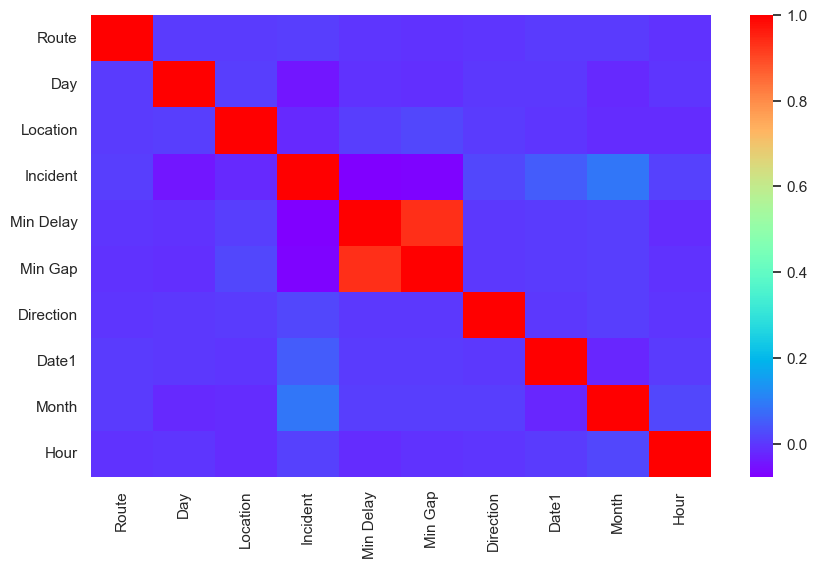

In [45]:
plt.figure(figsize = (10,6))
sns.heatmap(df1.corr(), cmap = "rainbow")

In [46]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
Df1_scaled = pd.DataFrame()
Df1_scaled[df1.columns] = scaler.fit_transform(df1[list(df1.columns)])

In [48]:
Df1_scaled

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Date1,Month,Hour
0,0.000355,0.0,0.983061,0.24,0.000000,0.000000,0.333333,0.000000,0.000000,0.173913
1,0.000069,0.0,0.157188,0.68,0.010010,0.000000,0.333333,0.000000,0.000000,0.217391
2,0.000046,0.0,0.953748,0.68,0.024024,0.048048,0.333333,0.000000,0.000000,0.217391
3,0.000355,0.0,0.983061,0.24,0.015015,0.030030,0.333333,0.000000,0.000000,0.217391
4,0.000038,0.0,0.445498,1.00,0.030030,0.060060,0.000000,0.000000,0.000000,0.260870
...,...,...,...,...,...,...,...,...,...,...
71720,0.000008,1.0,0.144023,0.24,0.030030,0.060060,0.333333,0.966667,0.909091,1.000000
71721,0.000110,1.0,0.144813,0.96,0.010010,0.020020,0.333333,0.966667,0.909091,1.000000
71722,0.000023,1.0,0.857732,0.24,0.010010,0.020020,1.000000,0.966667,0.909091,0.000000
71723,0.000128,1.0,0.645691,0.08,0.011011,0.022022,1.000000,0.966667,0.909091,0.043478


In [49]:
# Feature Selection 

from sklearn.feature_selection import SelectKBest , chi2

In [50]:
Df1_scaled

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Date1,Month,Hour
0,0.000355,0.0,0.983061,0.24,0.000000,0.000000,0.333333,0.000000,0.000000,0.173913
1,0.000069,0.0,0.157188,0.68,0.010010,0.000000,0.333333,0.000000,0.000000,0.217391
2,0.000046,0.0,0.953748,0.68,0.024024,0.048048,0.333333,0.000000,0.000000,0.217391
3,0.000355,0.0,0.983061,0.24,0.015015,0.030030,0.333333,0.000000,0.000000,0.217391
4,0.000038,0.0,0.445498,1.00,0.030030,0.060060,0.000000,0.000000,0.000000,0.260870
...,...,...,...,...,...,...,...,...,...,...
71720,0.000008,1.0,0.144023,0.24,0.030030,0.060060,0.333333,0.966667,0.909091,1.000000
71721,0.000110,1.0,0.144813,0.96,0.010010,0.020020,0.333333,0.966667,0.909091,1.000000
71722,0.000023,1.0,0.857732,0.24,0.010010,0.020020,1.000000,0.966667,0.909091,0.000000
71723,0.000128,1.0,0.645691,0.08,0.011011,0.022022,1.000000,0.966667,0.909091,0.043478


In [51]:
X = df1.drop(['Min Delay'],axis=1)
Y = df1['Min Delay']

Features = SelectKBest(score_func=chi2 , k=5)
Best_feat = Features.fit(X,Y)

dfscores = pd.DataFrame(np.round(Best_feat.scores_,2))
df_X = pd.DataFrame(X.columns)

best_feat = pd.concat([df_X,dfscores],axis=1)

best_feat.columns = ['Features','Scores']
BF = pd.DataFrame(best_feat.nlargest(5,'Scores'))
print(BF)

   Features      Scores
4   Min Gap  3381664.17
0     Route  3294929.86
2  Location  2084172.21
3  Incident     8935.74
8      Hour     5135.02


In [52]:
X1 = Df1_scaled.drop(['Min Delay'],axis=1)
Y1 = Df1_scaled['Min Delay']

In [53]:
# Training and prediction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### How try all diffrent regression algorith and find the testing score

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [56]:
model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor,XGBRFRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,y_train)
    print(mod , 'accuracy',reg.score(X_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.8524498606512999
<class 'sklearn.svm._classes.SVR'> accuracy 0.017827652106011893
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.9323740771885224
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.8779063938079357
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.8238585211979182
<class 'xgboost.sklearn.XGBRFRegressor'> accuracy 0.9462705649040736


#### Here we see RandomForestRegressor gives us good score so we can use RandomForest Regressor algorithm

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.9875566515991141

In [59]:
reg_rf.score(X_test, y_test)

0.9301218784933867

#### Perform Hyper-prameter tuning using RandomizedSearchCV

In [54]:
from sklearn.model_selection import RandomizedSearchCV


###### create list for all possible parameter

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [59]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

##### Random search of parameters, using 5 fold cross validation and  search across 25 different combinations

In [60]:
rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 5, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = -1)

In [61]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [63]:
#### Best parameters RandomForest

In [64]:
reg_rf = RandomForestRegressor(n_estimators = 400,
 min_samples_split= 5,
 min_samples_leaf = 5,
 max_features = 'auto',
 max_depth = 15)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400)

In [65]:
y_pred = reg_rf.predict(X_test)

In [ ]:
# Model Evalution 

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [70]:
# check mean_absolute_error

mean_absolute_error(y_test, y_pred)

1.3564594012809257

In [72]:
# check mean_squared_error

mean_squared_error(y_test, y_pred)

48.280842735274206

In [74]:
# check r2_score

r2_score(y_test, y_pred)

0.9546007741923539

##### Shapash Model Explainer

In [75]:
from shapash.explainer.smart_explainer import SmartExplainer

In [76]:
smex = SmartExplainer(reg_rf)

In [77]:
smex.compile(
    x = X_test,
)

In [78]:
App = smex.run_app(title_story='TTC Dataset')

Dash is running on http://0.0.0.0:8050/



INFO:root:Your Shapash application run on http://Mahaveer:8050/
INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://10.0.0.108:8050
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET /assets/material-icons.css?m=1677984028.9914303 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET /assets/style.css?m=1677984028.9914303 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_8_1m1677976502.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_8_1m1677976502.8.1.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Mar/2023 13:11:23] "GET /_dash-component-suites/dash/deps/react@16.v2_8_1m1677976502.1

#### Time Series Analysis

In [41]:
df2 = pd.read_excel('Merged_Data.xlsx', usecols=['Date','Min Delay'])

In [42]:
from prophet import Prophet

In [43]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [44]:
df2 = df2[df2['Date'] > '2019']

In [45]:
df2.columns = ['ds','y']

In [46]:
df2.head()

,ds,y
297901,2019-01-02,10.0
297902,2019-01-02,35.0
297903,2019-01-02,33.0
297904,2019-01-02,10.0
297905,2019-01-02,10.0


In [47]:
m = Prophet()
m.fit(df2)

19:56:03 - cmdstanpy - INFO - Chain [1] start processing
19:56:49 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1785,2023-11-26
1786,2023-11-27
1787,2023-11-28
1788,2023-11-29
1789,2023-11-30


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1785,2023-11-26,18.200756,-59.563119,94.969431
1786,2023-11-27,15.070082,-64.266215,97.529395
1787,2023-11-28,14.867215,-72.462772,88.103650
1788,2023-11-29,13.802013,-71.851187,88.318247
1789,2023-11-30,13.275490,-65.046971,99.354563


(0.0, 40.0)

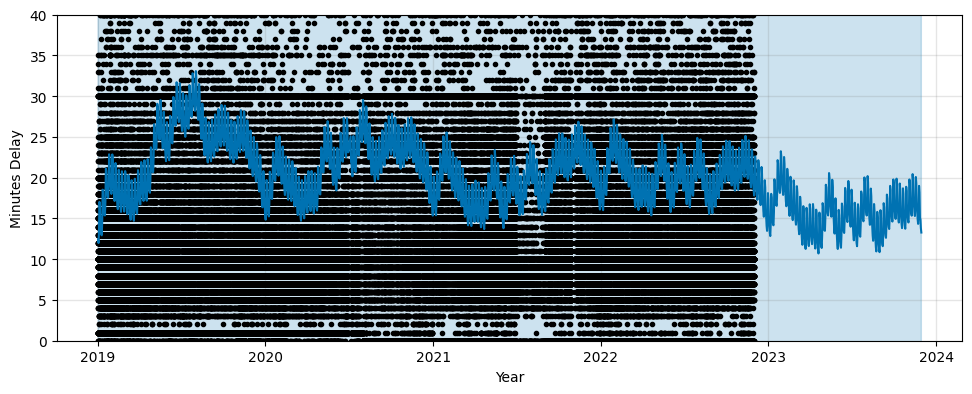

In [50]:
# plt.figure(figsize = (10,6))
fig1 = m.plot(forecast, figsize=(10,4), xlabel='Year', ylabel='Minutes Delay')
plt.ylim([0,40])

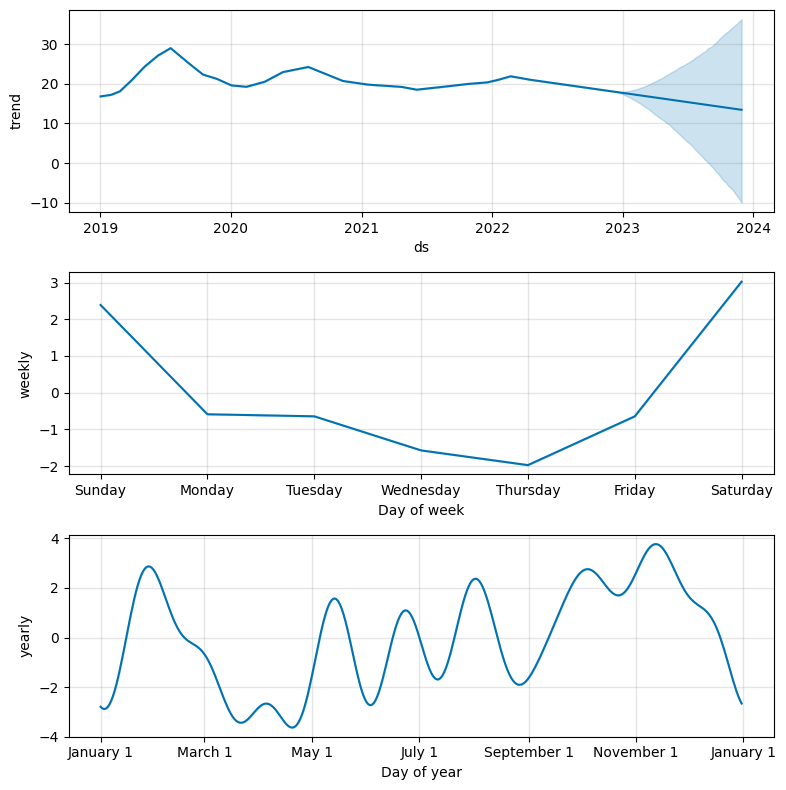

In [51]:
fig2 = m.plot_components(forecast , figsize=(8,8))